# **Modelling and Evaluation**

## Objectives

* Answer business requirement 2:
    * The client is interested in being able to tell if a given image is a vehicle or not.

## Inputs

* The image shape embeddings from the pickle file.
* The images are taken from the subfolders of test, train and validation folders.

* ── inputs
* 		└──vehicle_dataset
* 		      └──vehicle
* 					├── test
* 					│	├── non-vehicles
* 					│	└── vehicles
* 					├── train
* 					│	├── non-vehicles
* 					│	└── vehicles
* 					└── validation
* 							├── non-vehicles
* 							└── vehicles

## Outputs


## Additional Comments



---

# Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import plotly.express as px
sns.set_style("white")
from matplotlib.image import imread


---

# Change Working Directory

Change the working directory from its current folder to its parent folder

* We access the current directory with os.getcwd()

In [2]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\theph\\source\\repos\\Thephelpster\\CI_PP5_VD\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory

* os.path.dirname() gets the parent directory
* os.chdir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\theph\\source\\repos\\Thephelpster\\CI_PP5_VD'

## Set Input Directories

Set train, validation and test paths.

In [5]:
my_data_dir = 'inputs/vehicle-detection-image-set/data'
train_path = my_data_dir + '/train' 
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set Output Directory

In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


## Set Labels

In [7]:
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['non-vehicles', 'vehicles']


## Set Image Shape

In [8]:
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(64, 64, 3)

---

# Image Distribution

## Count Number of Images per Label and Set

In [9]:
df_freq = pd.DataFrame([])
for folder in ['train', 'validation', 'test']:
    for label in labels:
        df_freq = df_freq.append(
            pd.Series(data={'Set': folder,
                            'Label': label,
                            'Count': int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))}
                      ),
            ignore_index=True
        )

        print(
            f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")

total_label_distribution = df_freq.groupby('Label')['Count'].sum()

report = "Total dataset balance report:\n"
for label, count in total_label_distribution.items():
    report += f"Label - {label}: {int(count)} images\n"

print(report)

* train - non-vehicles: 6277 images
* train - vehicles: 6154 images
* validation - non-vehicles: 896 images
* validation - vehicles: 879 images
* test - non-vehicles: 1795 images
* test - vehicles: 1759 images


Total dataset balance report:
Label - non-vehicles: 8968 images
Label - vehicles: 8792 images



## Pie Chart of Set Distribution

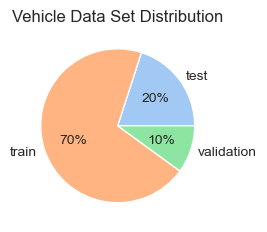

In [10]:
folders = os.listdir(my_data_dir)
data=[]
for folder in folders:
    for label in labels:
        n=int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))
        n+=n
    data.append(n)

px = 1/plt.rcParams['figure.dpi'] 
plt.subplots(figsize=(800*px, 250*px))
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = folders, colors = colors, autopct='%.0f%%')
plt.title('Vehicle Data Set Distribution')
plt.savefig(f'{file_path}/sets_distribution_pie.png',
            bbox_inches='tight', dpi=150)
plt.show()

---

# Image Data Augmentation

## Import ImageDataGenerator

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Initialize ImageDataGenerator


In [12]:
augmented_image_data = ImageDataGenerator(rotation_range=15,
                                          width_shift_range=0.1,
                                          height_shift_range=0.1,
                                          shear_range=0.5,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1.0/255.0,
                                          brightness_range=[0.5, 1.5],
                                          )

## Set Batch Size


In [13]:
batch_size = 25

## Augmentation of the Training Image Dataset

In [14]:
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='categorical',
                                                     shuffle=True
                                                     )

train_set.class_indices

Found 12431 images belonging to 2 classes.


{'non-vehicles': 0, 'vehicles': 1}

## Augmentation of the Validation Image Dataset

In [15]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='categorical',
                                                                        shuffle=True
                                                                        )

validation_set.class_indices

Found 1775 images belonging to 2 classes.


{'non-vehicles': 0, 'vehicles': 1}

## Augmentation of the Test Image Dataset

In [16]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='categorical',
                                                                  shuffle=True
                                                                  )

test_set.class_indices

Found 3554 images belonging to 2 classes.


{'non-vehicles': 0, 'vehicles': 1}

## Plot Augmented Training Image Set

(25, 64, 64, 3)


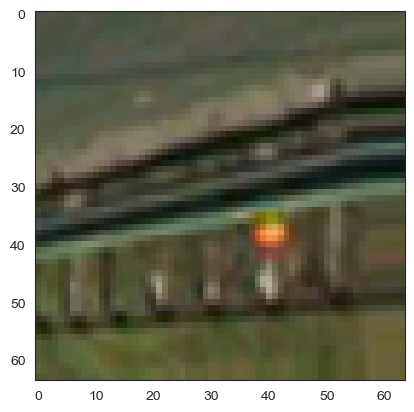

(25, 64, 64, 3)


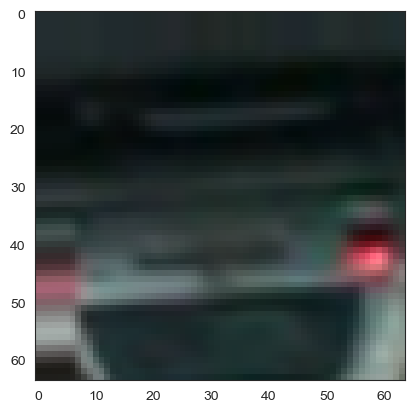

(25, 64, 64, 3)


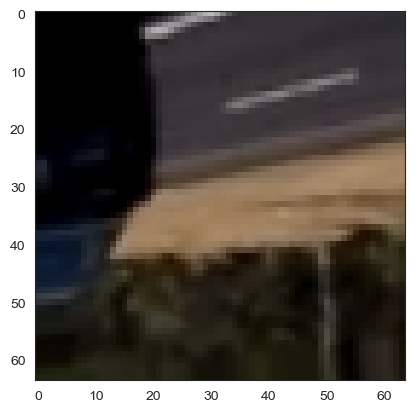

In [17]:
for i in range(3):
    img, label = train_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

## Plot Augmented Validation Image Set

(25, 64, 64, 3)


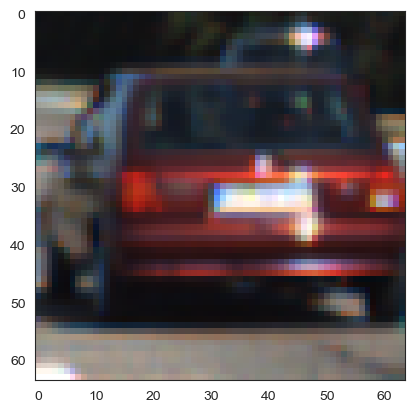

(25, 64, 64, 3)


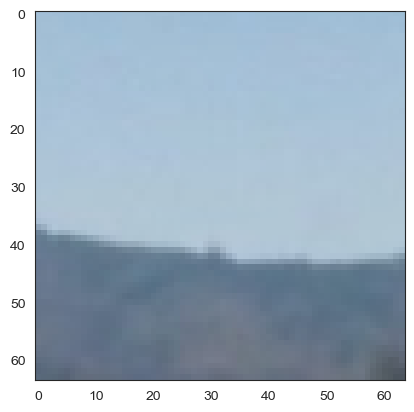

(25, 64, 64, 3)


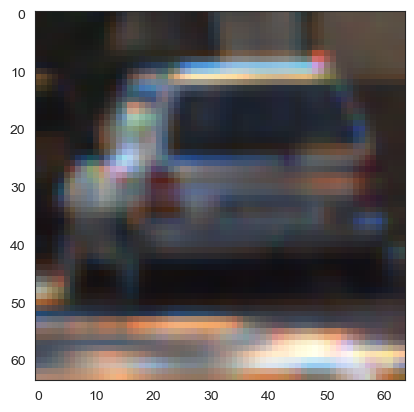

In [18]:
for i in range(3):
    img, label = validation_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

## Plot Augmented Test Image Set

(25, 64, 64, 3)


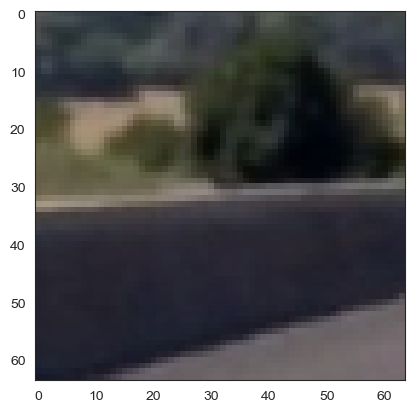

(25, 64, 64, 3)


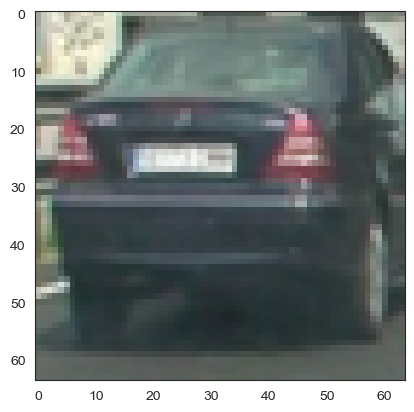

(25, 64, 64, 3)


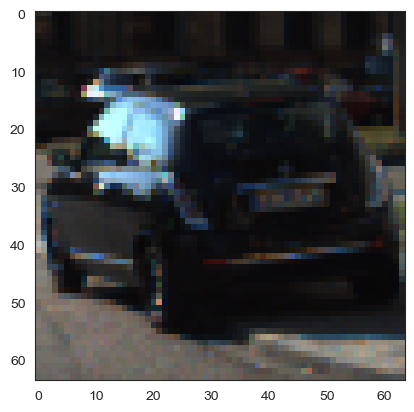

In [19]:
for i in range(3):
    img, label = test_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

## Save class_indices

In [20]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

---

# Model Creation

## Import Model Packages

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import RMSprop, Adam, Adagrad

## Model

## Hypertuning the Model

In [22]:
def create_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), input_shape=image_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))      
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(.2))

    model.add(Dense(2, activation='softmax')) 

    model.compile(loss='binary_crossentropy', 
                  optimizer='adagrad',
                  metrics=['accuracy'])

    return model

## Model Summary

In [23]:
create_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

## Call Backs

In [24]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

## Fit Model for Training

In [25]:
model = create_model()
model.fit(train_set,
          batch_size=batch_size,
          epochs=25,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )

Epoch 1/25
497/497 [==============================] - 25s 49ms/step - loss: 0.6801 - accuracy: 0.5900 - val_loss: 0.6670 - val_accuracy: 0.6321
Epoch 2/25
497/497 [==============================] - 19s 38ms/step - loss: 0.6338 - accuracy: 0.7302 - val_loss: 0.5916 - val_accuracy: 0.7977
Epoch 3/25
497/497 [==============================] - 19s 38ms/step - loss: 0.5412 - accuracy: 0.7774 - val_loss: 0.4677 - val_accuracy: 0.8214
Epoch 4/25
497/497 [==============================] - 19s 38ms/step - loss: 0.4588 - accuracy: 0.8075 - val_loss: 0.3849 - val_accuracy: 0.8428
Epoch 5/25
497/497 [==============================] - 19s 38ms/step - loss: 0.4178 - accuracy: 0.8273 - val_loss: 0.3491 - val_accuracy: 0.8496
Epoch 6/25
497/497 [==============================] - 19s 37ms/step - loss: 0.3922 - accuracy: 0.8303 - val_loss: 0.3351 - val_accuracy: 0.8490
Epoch 7/25
497/497 [==============================] - 19s 37ms/step - loss: 0.3787 - accuracy: 0.8364 - val_loss: 0.3401 - val_accuracy:

## Load Best Saved Model

In [26]:
model.save('outputs/v1/vehicle_detection_model.h5')

---

# Model Performance

## Model Learning Curve

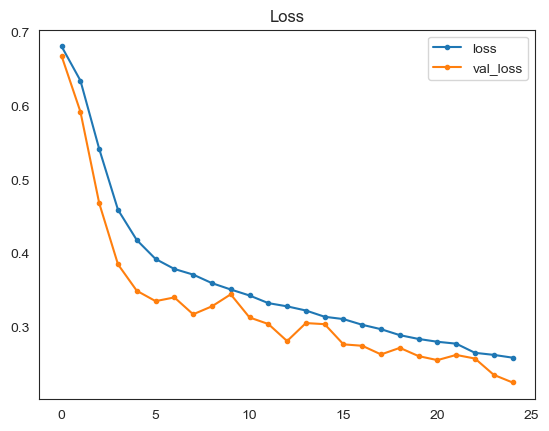

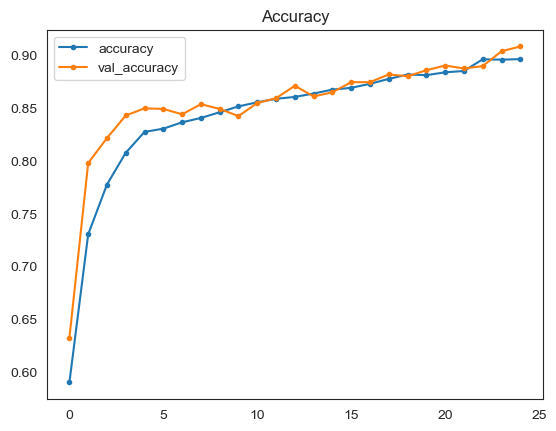

In [27]:
losses = pd.DataFrame(model.history.history)

losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png', bbox_inches='tight',
            dpi=150)
plt.show()

print("\n")
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png', bbox_inches='tight',
            dpi=150)
plt.show()

---

# Model Evaluation

## Import Packages

In [28]:
labels

['non-vehicles', 'vehicles']

In [29]:
import sklearn
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

In [30]:
validation_set.reset()

x_true, y_true = next(test_set)
preds = np.argmax(model.predict(test_set), axis=1)
y_pred = np.rint(preds)
y_true = test_set.labels

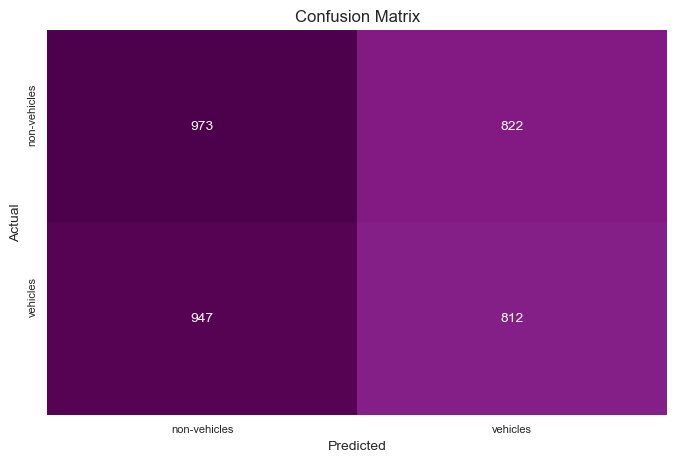

In [31]:
cm = confusion_matrix(y_true,y_pred)

classes=list(test_set.class_indices.keys()) 
length=len(classes)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='BuPu', cbar=False)       
plt.xticks(np.arange(length)+.5, classes, rotation= 0, fontsize=8)
plt.yticks(np.arange(length)+.3, classes, rotation=90, fontsize=8)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig(f'{file_path}/confusion_matrix.png',
            bbox_inches='tight', dpi=150)
plt.show()

## Load Best Saved Model

In [32]:
from keras.models import load_model

load_model('outputs/v1/vehicle_detection_model.h5')

## Evaluate Model Using Test Set

In [33]:
evaluation = model.evaluate(test_set)

143/143 [==============================] - 1s 10ms/step - loss: 0.2162 - accuracy: 0.9018


## Save Evaluation Pickle

In [34]:
joblib.dump(value=evaluation,
            filename=f"outputs/{version}/evaluation.pkl")

['outputs/v1/evaluation.pkl']

---

# Predict on New Data

Image shape: (64, 64), Image mode: RGB


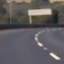

In [66]:
from tensorflow.keras.preprocessing import image

pointer = 33

label = labels[0]

pil_image = image.load_img(test_path + '/' + label + '/' + os.listdir(test_path+'/' + label)[pointer],
                           target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

In [67]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 64, 64, 3)


In [68]:
pred_proba = model.predict(my_image)[0, 1]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_proba > 0.5]

if pred_class == target_map[0]:
    pred_proba = 1 - pred_proba

print(pred_proba)
print(f"{pred_class} {round(pred_proba*100, 2)}%")

0.9449429959058762
non-vehicles 94.49%
